In this notebook we will be going over the question of *why* lara reacts the way she does towards the data given to her by understanding how Lara actually performs, and where she fails. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# load and prep the dataset

df = pd.read_csv('../data/adult_clean.csv')
X = df.drop(columns=['class'])
y = df['class']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# preprocessing 
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
) 
# train the model once more
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
]) 
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

print(f"Model ready. Test Set: {len(y_test)} rows")

Model ready. Test Set: 9045 rows


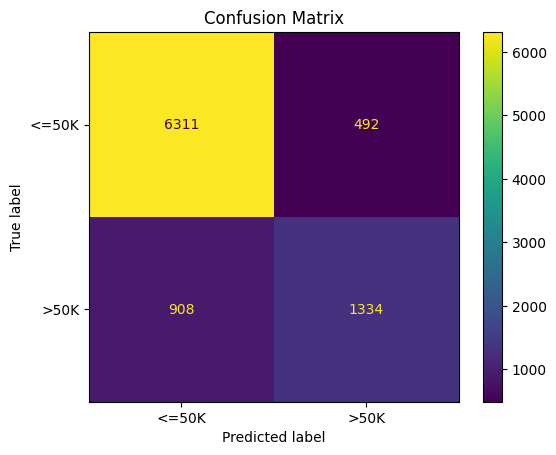

[[6311  492]
 [ 908 1334]]


In [2]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

print(cm)

In [3]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      6803
        >50K       0.73      0.60      0.66      2242

    accuracy                           0.85      9045
   macro avg       0.80      0.76      0.78      9045
weighted avg       0.84      0.85      0.84      9045



In [4]:
X_test_with_labels = X_test.copy()
X_test_with_labels['y_true'] = y_test.values
X_test_with_labels['y_pred'] = y_pred

for sex in ['Male', 'Female']:
    subset = X_test_with_labels[X_test_with_labels['sex'] == sex]
    print(f"\n=== {sex} ===")
    print(classification_report(subset['y_true'], subset['y_pred']))


=== Male ===
              precision    recall  f1-score   support

       <=50K       0.84      0.90      0.87      4248
        >50K       0.73      0.62      0.67      1879

    accuracy                           0.81      6127
   macro avg       0.78      0.76      0.77      6127
weighted avg       0.81      0.81      0.81      6127


=== Female ===
              precision    recall  f1-score   support

       <=50K       0.93      0.98      0.95      2555
        >50K       0.76      0.48      0.59       363

    accuracy                           0.92      2918
   macro avg       0.85      0.73      0.77      2918
weighted avg       0.91      0.92      0.91      2918



In [5]:
X_test_with_labels = X_test.copy()
X_test_with_labels['y_true'] = y_test.values
X_test_with_labels['y_pred'] = y_pred

for race in df['race'].unique():
    subset = X_test_with_labels[X_test_with_labels['race'] == race]
    if len(subset) > 100:
        print(f"\n=== {race} ===")
        print(classification_report(subset['y_true'], subset['y_pred']))


=== Black ===
              precision    recall  f1-score   support

       <=50K       0.92      0.96      0.94       727
        >50K       0.65      0.45      0.53       111

    accuracy                           0.89       838
   macro avg       0.78      0.71      0.74       838
weighted avg       0.88      0.89      0.89       838


=== White ===
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      5742
        >50K       0.73      0.60      0.66      2037

    accuracy                           0.84      7779
   macro avg       0.80      0.76      0.78      7779
weighted avg       0.83      0.84      0.83      7779


=== Asian-Pac-Islander ===
              precision    recall  f1-score   support

       <=50K       0.89      0.90      0.90       186
        >50K       0.73      0.72      0.73        72

    accuracy                           0.85       258
   macro avg       0.81      0.81      0.81       258
weighted avg    